# Forth order Runge-Kutta Method
The Runge-Kutta method is a numerical method used to solve ordinary differential equations (ODEs). It is a popular method because it is relatively simple to implement and provides accurate results for a wide range of problems.

* ####  First-Order ODE

The general form of a first-order ODE is:

$$\frac{dy}{dx} = f(x,y)$$

where $y$ is the dependent variable and $f$ is a function of $x$ and $y$. The Runge-Kutta method works by approximating the value of $y$ at discrete time steps, using the following formula:

$$k_1 = f(x_n, y_n)$$

$$k_2 = f(x_n + \frac{h}{2}, y_n +k_1 \frac{h}{2})$$

$$k_3 = f(x_n + \frac{h}{2}, y_n +k_2 \frac{h}{2})$$

$$k_4 = f(x_n + h, y_n +h k_3)$$

$$y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

where $h$ is the time step, $x_n$ is the current time, and $y_n$ is the current value of $y$.

Another way to calculate RK4 is:
$$k_1 = h f(x_n, y_n)$$

$$k_2 = h f(x_n + \frac{h}{2}, y_n + \frac{k_1}{2})$$

$$k_3 = h f(x_n + \frac{h}{2}, y_n + \frac{k_2}{2})$$

$$k_4 = h f(x_n + h, y_n + k_3)$$

$$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

* ### Python Implementation

Here's how you can implement the Runge-Kutta method in Python:


In [82]:
import numpy as np

def rk4(f, y0, x0, xf, h):
    x = np.arange(x0, xf+h, h)
    y = np.zeros(len(x))
    y[0] = y0
    
    for i in range (1, len(x)):
        k1 = h * f(x[i-1] , y[i-1])
        k2 = h * f(x[i-1]+ h/2 , y[i-1]+ h* k1/2 )
        k3 = h * f(x[i-1]+ h/2 , y[i-1]+h* k2/2)
        k4 = h * f(x[i-1]+ h ,  y[i-1]+ h* k3)
        y[i] = y[i-1] + (1/6)*(k1 +2*k2 + 2*k3 + k4)
        
    return x, y

    """
    Fourth-order Runge-Kutta method for solving ODEs.
    
    Parameters:
        f: function that defines the ODE dy/dt = f(t, y)
        y0: initial value of y
        t: array of time steps
        
    Returns:
        y: array of approximate values of y at each time step
    """

In [78]:
import numpy as np

def rk41(f, y0, x0, xf, h):
    x = np.arange(x0, xf+h, h)
    y = np.zeros(len(x))
    y[0] = y0
    
    for i in range (1, len(x)):
        k1 =  f(x[i-1] , y[i-1])
        k2 = f(x[i-1]+ h/2 , y[i-1]+ k1/2 )
        k3 = f(x[i-1]+ h/2 , y[i-1]+ k2/2)
        k4 =  f(x[i-1]+ h ,  y[i-1]+ k3)
        y[i] = y[i-1] + (h/6)*(k1 +2*k2 + 2*k3 + k4)
        
    return x, y

In [79]:
#first example
def f1(x, y):
    return -2*x*y

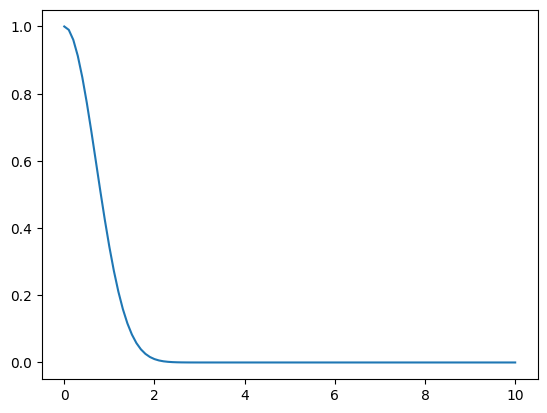

In [80]:
# set initial conditions
y0 = 1
t0 = 0.0
tf = 10.0
dt = 0.1


t,y = rk4( f1, y0, t0, tf, dt)


import matplotlib.pyplot as plt
plt.plot(t,y)
#print (y)                       #This will print an array of approximate values of y at each time step.

In [70]:
#second example

def f2(x, y):
    return -3*x**2

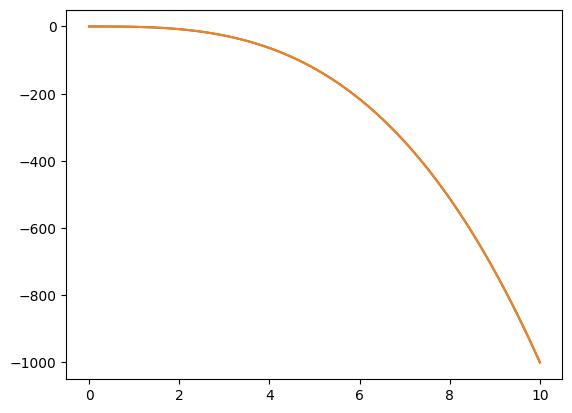

In [73]:
# set initial conditions
y0 = 0
t0 = 0.0
tf = 10.0
dt = 0.1

y = rk41(f2, y0, t0, tf, dt)
t=np.linspace(0,10,101)
x=np.linspace(0,10,101)
import matplotlib.pyplot as plt

plt.plot(t,y)                     # Numerical answer of f2 function
plt.plot(x,-x**3)                 # Analytical answer of f2 function
#print (y)                        # This will print an array of approximate values of y at each time step.

* ## Other way to solve

In [13]:
import numpy as np
from scipy.integrate import solve_ivp

# define the ODE
def my_ode(t, y):
    dydt = 2 * y
    return dydt

# set initial conditions and time grid
y0 = 1
t_span = (0, 2)
t_eval = np.linspace(t_span[0], t_span[1], 30)

# solve the ODE using RK4
sol = solve_ivp(my_ode, t_span, [y0], t_eval=t_eval, method='RK45')

# print the solution
print(sol.y[0])

[ 1.          1.14789638  1.31771214  1.5126191   1.73624947  1.99291909
  2.28762854  2.62606311  3.0145928   3.46066679  3.97273873  4.55994624
  5.23346208  6.00652693  6.89444939  7.914606    9.08644124 10.43146749
 11.97525843 13.74762009 15.77949092 18.10915323 20.78241718 23.85262086
 27.38063019 31.434839   36.09116898 41.4330812  47.56089618 54.59497095]
